<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Toronto City</font></h1>


## Introduction



For this exercise, assume we want to open our first Pastry shop in Toronto. This will be our very first store. Which locations can we consider?

Our Pastry shop concept focuses on products that go well with either coffee or tea. While there will be a small area reserved for diners, we are considering take-aways to drive most purchases. The product selection will focus on pastry products only. However, we want to take the opportunity to possibly position ourselves in neighborhoods with coffee shops and tea houses that serve products to complement our pastries.

### Limitations

The analysis uses data for Toronto pulled from Wikipedia, in conjunction with geolocation data from FourSquare, taking from the IBM Data Science Capstone Course.

While the information here may be of interest to entrepreneurs in search of a brief analysis within the context stated in the introduction above, data science learners or junior professionals, do take note of the limitations above.

Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge geopy --yes 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes 

import folium # map rendering library

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>


## 1. Scrape Toronto Dataset from Wiki and Load Into Dataframe


In [2]:
# run the code below if the wikipedia package needs to be installed
#conda install -c conda-forge wikipedia

#### Load and explore the data

In [3]:
import wikipedia as wp

In [4]:
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html, header = 0)[0]
df.head()

Postal Code           Borough              Neighbourhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

#### Remove codes without assigned Boroughs

In [5]:
df_PostalCodes = df[df['Borough']!="Not assigned"]
df_PostalCodes.reset_index(inplace=True, drop=True)
df_PostalCodes.head()

Postal Code           Borough                                Neighbourhood
0         M3A        North York                                    Parkwoods
1         M4A        North York                             Victoria Village
2         M5A  Downtown Toronto                    Regent Park, Harbourfront
3         M6A        North York             Lawrence Manor, Lawrence Heights
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

In [6]:
df_PostalCodes

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                         Neighbourhood  
0                                            Parkwoods  
1                                     Vic

For the analysis, we are including only those neighbourhoods with boroughs assigned to them. We note that within each borough there are multiple postal codes and neighbourhoods


In [7]:
df_PostalCodes.shape

(103, 3)

## 2. Obtain the coordinates of each neighbourhood

In [8]:
df_Coordinates=pd.read_csv('http://cocl.us/Geospatial_data')
df_Coordinates

Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
5           M1J  43.744734 -79.239476
6           M1K  43.727929 -79.262029
7           M1L  43.711112 -79.284577
8           M1M  43.716316 -79.239476
9           M1N  43.692657 -79.264848
10          M1P  43.757410 -79.273304
11          M1R  43.750072 -79.295849
12          M1S  43.794200 -79.262029
13          M1T  43.781638 -79.304302
14          M1V  43.815252 -79.284577
15          M1W  43.799525 -79.318389
16          M1X  43.836125 -79.205636
17          M2H  43.803762 -79.363452
18          M2J  43.778517 -79.346556
19          M2K  43.786947 -79.385975
20          M2L  43.757490 -79.374714
21          M2M  43.789053 -79.408493
22          M2N  43.770120 -79.408493
23          M2P  43.752758 -79.400049
24          M2R  43.782736 -79.442259
25          M3A  43.753259 -79.329656
26          M3B  43.745906 -79.352188
27          M3C  43.725900 -79.340923
28          M3H  43.754328 -79.442259
29          M3J  43.767980 -79.487262
30          M3K  43.737473 -79.464763
31          M3L  43.739015 -79.506944
32          M3M  43.728496 -79.495697
33          M3N  43.761631 -79.520999
34          M4A  43.725882 -79.315572
35          M4B  43.706397 -79.309937
36          M4C  43.695344 -79.318389
37          M4E  43.676357 -79.293031
38          M4G  43.709060 -79.363452
39          M4H  43.705369 -79.349372
40          M4J  43.685347 -79.338106
41          M4K  43.679557 -79.352188
42          M4L  43.668999 -79.315572
43          M4M  43.659526 -79.340923
44          M4N  43.728020 -79.388790
45          M4P  43.712751 -79.390197
46          M4R  43.715383 -79.405678
47          M4S  43.704324 -79.388790
48          M4T  43.689574 -79.383160
49          M4V  43.686412 -79.400049
50          M4W  43.679563 -79.377529
51          M4X  43.667967 -79.367675
52          M4Y  43.665860 -79.383160
53          M5A  43.654260 -79.360636
54          M5B  43.657162 -79.378937
55          M5C  43.651494 -79.375418
56          M5E  43.644771 -79.373306
57          M5G  43.657952 -79.387383
58          M5H  43.650571 -79.384568
59          M5J  43.640816 -79.381752
60          M5K  43.647177 -79.381576
61          M5L  43.648198 -79.379817
62          M5M  43.733283 -79.419750
63          M5N  43.711695 -79.416936
64          M5P  43.696948 -79.411307
65          M5R  43.672710 -79.405678
66          M5S  43.662696 -79.400049
67          M5T  43.653206 -79.400049
68          M5V  43.628947 -79.394420
69          M5W  43.646435 -79.374846
70          M5X  43.648429 -79.382280
71          M6A  43.718518 -79.464763
72          M6B  43.709577 -79.445073
73          M6C  43.693781 -79.428191
74          M6E  43.689026 -79.453512
75          M6G  43.669542 -79.422564
76          M6H  43.669005 -79.442259
77          M6J  43.647927 -79.419750
78          M6K  43.636847 -79.428191
79          M6L  43.713756 -79.490074
80          M6M  43.691116 -79.476013
81          M6N  43.673185 -79.487262
82          M6P  43.661608 -79.464763
83          M6R  43.648960 -79.456325
84          M6S  43.651571 -79.484450
85          M7A  43.662301 -79.389494
86          M7R  43.636966 -79.615819
87          M7Y  43.662744 -79.321558
88          M8V  43.605647 -79.501321
89          M8W  43.602414 -79.543484
90          M8X  43.653654 -79.506944
91          M8Y  43.636258 -79.498509
92          M8Z  43.628841 -79.520999
93          M9A  43.667856 -79.532242
94          M9B  43.650943 -79.554724
95          M9C  43.643515 -79.577201
96          M9L  43.756303 -79.565963
97          M9M  43.724766 -79.532242
98          M9N  43.706876 -79.518188
99          M9P  43.696319 -79.532242
100         M9R  43.688905 -79.554724
101         M9V  43.739416 -79.588437
102         M9W  43.706748 -79.594054

#### Merge coordinates with the postal codes


In [9]:
df_Canada = pd.merge(df_PostalCodes, df_Coordinates, on='Postal Code')
df_Canada

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                         Neighbourhood   Latitude  Longitude  
0                                            Parkwoods  43.753259 -79.329656

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_Canada['Borough'].unique()),
        df_Canada.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


As some postal codes contain multiple neighbourhoods, we need to assign each neighbourhood to its own row, then update coordinates using the expanded data set

In [11]:
df_Canada = df_Canada.assign(Neighbourhood=df_Canada['Neighbourhood'].str.split(', ')).explode('Neighbourhood')

In [12]:
df_Canada

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
2           M5A  Downtown Toronto   
3           M6A        North York   
3           M6A        North York   
4           M7A  Downtown Toronto   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
5           M9A         Etobicoke   
6           M1B       Scarborough   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
8           M4B         East York   
9           M5B  Downtown Toronto   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
12          M1C       Scarborough   
12          M1C       Scarborough   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
18          M1E       Scarborough   
18          M1E       Scarborough   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
28          M3H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
30          M5H  Downtown Toronto   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
33          M2J        North York   
33          M2J        North York   
34          M3J        North York   
34          M3J        North York   
35          M4J         East York   
35          M4J         East York   
36          M5J  Downtown Toronto   
36          M5J  Downtown Toronto   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
38          M1K       Scarborough   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
43          M6K      West Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
44          M1L       Scarborough   
44          M1L       Scarborough   
45          M2L        North York   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
49          M6L        North York   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
51          M1M       Scarborough   
51          M1M       Scarborough   
52          M2M        North York   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
55          M5M        North York   
56          M6M              York   
56          M6M              York   
56          M6M              York   
57          M9M        North York   
57      

In [13]:
df_Canada["Address"] = df_Canada["Neighbourhood"] +  ", Toronto City, ON, Canada"
df_Canada

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
2           M5A  Downtown Toronto   
3           M6A        North York   
3           M6A        North York   
4           M7A  Downtown Toronto   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
5           M9A         Etobicoke   
6           M1B       Scarborough   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
8           M4B         East York   
9           M5B  Downtown Toronto   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
12          M1C       Scarborough   
12          M1C       Scarborough   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
18          M1E       Scarborough   
18          M1E       Scarborough   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
28          M3H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
30          M5H  Downtown Toronto   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
33          M2J        North York   
33          M2J        North York   
34          M3J        North York   
34          M3J        North York   
35          M4J         East York   
35          M4J         East York   
36          M5J  Downtown Toronto   
36          M5J  Downtown Toronto   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
38          M1K       Scarborough   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
43          M6K      West Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
44          M1L       Scarborough   
44          M1L       Scarborough   
45          M2L        North York   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
49          M6L        North York   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
51          M1M       Scarborough   
51          M1M       Scarborough   
52          M2M        North York   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
55          M5M        North York   
56          M6M              York   
56          M6M              York   
56          M6M              York   
57          M9M        North York   
57      

#### Use geopy library to update the coordintes of the neighbourhoods

In [14]:
geolocator = Nominatim(user_agent="toronto_explorer")

In [15]:
df_Canada["Coordinates"] = df_Canada["Address"].apply(geolocator.geocode)
df_Canada["Latitude"] = df_Canada["Coordinates"].apply(lambda x: x.latitude if x!= None else None)
df_Canada["Longitude"] = df_Canada["Coordinates"].apply(lambda x: x.longitude if x!= None else None)
df_Canada

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
2           M5A  Downtown Toronto   
3           M6A        North York   
3           M6A        North York   
4           M7A  Downtown Toronto   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
5           M9A         Etobicoke   
6           M1B       Scarborough   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
8           M4B         East York   
9           M5B  Downtown Toronto   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
11          M9B         Etobicoke   
12          M1C       Scarborough   
12          M1C       Scarborough   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
17          M9C         Etobicoke   
18          M1E       Scarborough   
18          M1E       Scarborough   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
28          M3H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
30          M5H  Downtown Toronto   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
33          M2J        North York   
33          M2J        North York   
34          M3J        North York   
34          M3J        North York   
35          M4J         East York   
35          M4J         East York   
36          M5J  Downtown Toronto   
36          M5J  Downtown Toronto   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
38          M1K       Scarborough   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
43          M6K      West Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
44          M1L       Scarborough   
44          M1L       Scarborough   
45          M2L        North York   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
49          M6L        North York   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
51          M1M       Scarborough   
51          M1M       Scarborough   
52          M2M        North York   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
55          M5M        North York   
56          M6M              York   
56          M6M              York   
56          M6M              York   
57          M9M        North York   
57      

Remove data points that do not have any coordinates provided by Foursquare

In [16]:
df_Canada.dropna(inplace=True)
df_Canada.reset_index(inplace=True, drop=True)

In [17]:
df_Canada

Postal Code           Borough                    Neighbourhood   Latitude  \
0           M3A        North York                        Parkwoods  43.761124   
1           M4A        North York                 Victoria Village  43.732658   
2           M5A  Downtown Toronto                      Regent Park  43.660706   
3           M5A  Downtown Toronto                     Harbourfront  43.640080   
4           M6A        North York                   Lawrence Manor  43.722079   
5           M6A        North York                 Lawrence Heights  43.722778   
6           M7A  Downtown Toronto                     Queen's Park  43.659659   
7           M9A         Etobicoke                 Islington Avenue  43.621482   
8           M9A         Etobicoke            Humber Valley Village  43.666472   
9           M1B       Scarborough                          Malvern  43.809196   
10          M1B       Scarborough                            Rouge  43.804930   
11          M3B        North York                        Don Mills  43.775347   
12          M4B         East York                 Woodbine Gardens  43.712078   
13          M5B  Downtown Toronto                  Garden District  43.656500   
14          M5B  Downtown Toronto                          Ryerson  43.658469   
15          M6B        North York                        Glencairn  43.708712   
16          M9B         Etobicoke                  West Deane Park  43.663199   
17          M9B         Etobicoke                 Princess Gardens  43.640466   
18          M9B         Etobicoke                        Islington  43.645335   
19          M9B         Etobicoke                       Cloverdale  43.633637   
20          M1C       Scarborough                       Rouge Hill  43.780271   
21          M1C       Scarborough                       Port Union  43.775504   
22          M1C       Scarborough                   Highland Creek  43.790117   
23          M3C        North York                        Don Mills  43.775347   
24          M4C         East York                 Woodbine Heights  43.699920   
25          M5C  Downtown Toronto                   St. James Town  43.669403   
26          M6C              York               Humewood-Cedarvale  43.688322   
27          M9C         Etobicoke                         Eringate  43.662273   
28          M9C         Etobicoke                Bloordale Gardens  43.635317   
29          M9C         Etobicoke                Old Burnhamthorpe  43.639373   
30          M1E       Scarborough                        Guildwood  43.755225   
31          M1E       Scarborough                      Morningside  43.782601   
32          M1E       Scarborough                        West Hill  43.768914   
33          M4E      East Toronto                      The Beaches  43.671024   
34          M5E  Downtown Toronto                      Berczy Park  43.647984   
35          M1G       Scarborough                           Woburn  43.759824   
36          M4G         East York                          Leaside  43.704798   
37          M5G  Downtown Toronto               Central Bay Street  43.655644   
38          M6G  Downtown Toronto                         Christie  43.664111   
39          M1H       Scarborough                        Cedarbrae  43.756467   
40          M2H        North York                Hillcrest Village  43.681695   
41          M3H        North York                   Bathurst Manor  43.665519   
42          M3H        North York                   Wilson Heights  43.740519   
43          M3H        North York                  Downsview North  43.749299   
44          M4H         East York                 Thorncliffe Park  43.704553   
45          M5H  Downtown Toronto                         Richmond  43.652744   
46          M5H  Downtown Toronto                         Adelaide  43.650298   
47          M5H  Downtown Toronto                             King  43.648949   
48          M6H      West Toronto  

In [18]:
df_Canada.shape

(194, 7)

## 3. Explore and cluster the neighborhoods in Toronto

#### Create a map of Toronto with neighborhoods superimposed on top.


In [19]:
address = 'Toronto, ON'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [20]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_Canada['Latitude'], df_Canada['Longitude'], df_Canada['Borough'], df_Canada['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.


Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.


#### Define Foursquare Credentials and Version


In [21]:
CLIENT_ID = '2OWJPPWP1XA3YB2A01ZPZME0BWRQAP0HYRAKAZLBGKMGG0K2' # your Foursquare ID
CLIENT_SECRET = 'A5Y3P12OTUYLKTZ14HCPIAMYI1KXZEDXHPUKW5GSIYTBXOWX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2OWJPPWP1XA3YB2A01ZPZME0BWRQAP0HYRAKAZLBGKMGG0K2
CLIENT_SECRET:A5Y3P12OTUYLKTZ14HCPIAMYI1KXZEDXHPUKW5GSIYTBXOWX


#### Let's explore the first neighborhood in our dataframe.


Get the neighborhood's name.

In [22]:
df_Canada.loc[0, 'Neighbourhood']

'Parkwoods'

Get the neighborhood's latitude and longitude values.


In [23]:
neighborhood_latitude = df_Canada.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_Canada.loc[0, 'Longitude'] # neighborhood longitude value
neighborhood_name = df_Canada.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7611243, -79.3240594.


#### Now, let's get the top 100 venues that are in Parkwoods within a radius of 1 kilometer.


First, let's create the GET request URL. Name your URL **url**.


In [24]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=2OWJPPWP1XA3YB2A01ZPZME0BWRQAP0HYRAKAZLBGKMGG0K2&client_secret=A5Y3P12OTUYLKTZ14HCPIAMYI1KXZEDXHPUKW5GSIYTBXOWX&v=20180605&ll=43.7611243,-79.3240594&radius=1000&limit=100'

Send the GET request and examine the resutls


In [25]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '600a2c4aef6ec337f1ed5be7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 31,
  'suggestedBounds': {'ne': {'lat': 43.77012430900001,
    'lng': -79.31162124478192},
   'sw': {'lat': 43.75212429099999, 'lng': -79.33649755521807}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b8991cbf964a520814232e3',
       'name': "Allwyn's Bakery",
       'location': {'address': '81 Underhill drive',
        'lat': 43.75984035203157,
        'lng': -79.32471879917513,
        'labeledLatLngs': [{'label': 'display',

We know that all the information is in the _items_ key. Before we proceed, let's define the **get_category_type** function


In [26]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a _pandas_ dataframe.


In [27]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-27-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


name            categories        lat        lng
0     Allwyn's Bakery  Caribbean Restaurant  43.759840 -79.324719
1         Tim Hortons                  Café  43.760668 -79.326368
2                LCBO          Liquor Store  43.757774 -79.314257
3                 A&W  Fast Food Restaurant  43.760643 -79.326865
4  Shoppers Drug Mart              Pharmacy  43.760857 -79.324961

And how many venues were returned by Foursquare?


In [28]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

31 venues were returned by Foursquare.


<a id='item2'></a>


### Explore Neighborhoods in Toronto


#### Let's create a function to repeat the same process to all the neighborhoods in Toronto


In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        #results = requests.get(url).json()["response"]['groups'][0]['items']
        results = requests.get(url).json()['response'].get('groups',[{}])[0].get('items', [])
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the above function on each neighborhood and create a new dataframe called _toronto_venues_.


In [30]:
toronto_venues = getNearbyVenues(names=df_Canada['Neighbourhood'],
                                   latitudes=df_Canada['Latitude'],
                                   longitudes=df_Canada['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park
Harbourfront
Lawrence Manor
Lawrence Heights
Queen's Park
Islington Avenue
Humber Valley Village
Malvern
Rouge
Don Mills
Woodbine Gardens
Garden District
Ryerson
Glencairn
West Deane Park
Princess Gardens
Islington
Cloverdale
Rouge Hill
Port Union
Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate
Bloordale Gardens
Old Burnhamthorpe
Guildwood
Morningside
West Hill
The Beaches
Berczy Park
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor
Wilson Heights
Downsview North
Thorncliffe Park
Richmond
Adelaide
King
Dufferin
Dovercourt Village
Scarborough Village
Fairview
Henry Farm
Oriole
Northwood Park
York University
East Toronto
Broadview North (Old East York)
Harbourfront East
Union Station
Toronto Islands
Little Portugal
Trinity
Kennedy Park
Ionview
East Birchmount Park
Bayview Village
Downsview
The Danforth West
Riverdale
Toronto Dominion Centre
Design Exchange
Brockton
Parkdale Vi

#### Let's check the size of the resulting dataframe


In [31]:
print(toronto_venues.shape)
toronto_venues.head()

(5735, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Parkwoods              43.761124              -79.324059   
1    Parkwoods              43.761124              -79.324059   
2    Parkwoods              43.761124              -79.324059   
3    Parkwoods              43.761124              -79.324059   
4    Parkwoods              43.761124              -79.324059   

                Venue  Venue Latitude  Venue Longitude        Venue Category  
0     Allwyn's Bakery       43.759840       -79.324719  Caribbean Restaurant  
1         Tim Hortons       43.760668       -79.326368                  Café  
2  Shoppers Drug Mart       43.760857       -79.324961              Pharmacy  
3                 A&W       43.760643       -79.326865  Fast Food Restaurant  
4         Food Basics       43.760549       -79.326045           Supermarket

Let's check how many venues were returned for each neighborhood


In [32]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                             
Adelaide                                           100   
Agincourt                                           13   
Agincourt North                                     27   
Alderwood                                            6   
Bathurst Manor                                      68   
Bathurst Quay                                       26   
Bayview Village                                     12   
Bedford Park                                         2   
Berczy Park                                        100   
Birch Cliff                                          4   
Bloordale Gardens                                    8   
Broadview North (Old East York)                      9   
Brockton                                            20   
CN Tower                                            54   
Cabbagetown                                         48   
Cedarbrae                                           23   
Central Bay Street                                  73   
Chinatown                                           61   
Christie                                            58   
Church and Wellesley                                78   
Clairlea                                            10   
Clarks Corners                                       3   
Cliffcrest                                           5   
Cliffside                                            7   
Cliffside West                                       7   
Cloverdale                                          27   
Commerce Court                                     100   
Davisville                                          39   
Davisville North                                    39   
Deer Park                                           56   
Design Exchange                                    100   
Don Mills                                          126   
Dorset Park                                         11   
Dovercourt Village                                  10   
Downsview                                           28   
Downsview North                                      7   
Dufferin                                            43   
East Birchmount Park                                 4   
East Toronto                                         4   
Emery                                               10   
Eringate                                             1   
Exhibition Place                                    37   
Fairview                                            97   
First Canadian Place                               100   
Forest Hill North & West                            21   
Forest Hill Road Park                                5   
Forest Hill SE                                       3   
Garden District                                     61   
Glencairn                                            7   
Golden Mile                                         61   
Grange Park                                        100   
Guildwood                                            5   
Harbord                                             73   
Harbourfront                                       100   
Harbourfront East                                  100   
Harbourfront West                                  100   
Henry Farm                                           4   
High Park                                           13   
Highland Creek                                       2   
Hillcrest Village                                   42   
Humber Bay                                           5   
Humber Summit                                        4   
Humber Valley Village                                5   
Humberlea                                            4   
Humewood-Cedarvale                                   5   
Ionview                                              4   
Islington                                           27   
Islington Avenue               

#### Let's find out how many unique categories can be curated from all the returned venues


In [33]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 325 uniques categories.


<a id='item3'></a>


### Analyze Each Neighborhood


In [34]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

Yoga Studio  Accessories Store  Afghan Restaurant  African Restaurant  \
0            0                  0                  0                   0   
1            0                  0                  0                   0   
2            0                  0                  0                   0   
3            0                  0                  0                   0   
4            0                  0                  0                   0   

   Airport  Airport Service  American Restaurant  Animal Shelter  \
0        0                0                    0               0   
1        0                0                    0               0   
2        0                0                    0               0   
3        0                0                    0               0   
4        0                0                    0               0   

   Antique Shop  Aquarium  Arepa Restaurant  Art Gallery  Art Museum  \
0             0         0                 0            0           0   
1             0         0                 0            0           0   
2             0         0                 0            0           0   
3             0         0                 0            0           0   
4             0         0                 0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auto Dealership  Auto Workshop  Automotive Shop  \
0                   0                0              0                0   
1                   0                0              0                0   
2                   0                0              0                0   
3                   0                0              0                0   
4                   0                0              0                0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0          0           0       0     0    0               0                 0   
1          0           0       0     0    0               0                 0   
2          0           0       0     0    0               0                 0   
3          0           0       0     0    0               0                 0   
4          0           0       0     0    0               0                 0   

   Basketball Stadium  Beach  Beach Bar  Bed & Breakfast  Beer Bar  \
0                   0      0          0                0         0   
1                   0      0          0                0         0   
2                   0      0          0                0         0   
3                   0      0          0                0         0   
4                   0      0          0                0         0   

   Beer Store  Belgian Restaurant  Big Box Store  Bike Rental / Bike Share  \
0           0                   0              0                         0   
1           0                   0              0                         0   
2           0                   0              0                         0   
3           0                   0              0                         0   
4           0                   0              0                         0   

   Bike Shop  Bike Trail  Bistro  Boat or Ferry  Bookstore  Boutique  \
0          0           0       0              0          0         0   
1          0           0       0              0          0         0   
2          0           0       0              0          0         0   
3          0           0       0              0          0         0   
4          0           0       0              0          0         0   

   Bowling Alley  Brazilian Restaurant  Breakfast Sp

And let's examine the new dataframe size.


In [35]:
toronto_onehot.shape

(5735, 325)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [36]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Yoga Studio  Accessories Store  \
0                           Adelaide     0.000000           0.000000   
1                          Agincourt     0.000000           0.000000   
2                    Agincourt North     0.000000           0.000000   
3                          Alderwood     0.000000           0.000000   
4                     Bathurst Manor     0.000000           0.000000   
5                      Bathurst Quay     0.000000           0.000000   
6                    Bayview Village     0.000000           0.000000   
7                       Bedford Park     0.000000           0.000000   
8                        Berczy Park     0.010000           0.000000   
9                        Birch Cliff     0.000000           0.000000   
10                 Bloordale Gardens     0.000000           0.000000   
11   Broadview North (Old East York)     0.000000           0.000000   
12                          Brockton     0.000000           0.000000   
13                          CN Tower     0.018519           0.000000   
14                       Cabbagetown     0.000000           0.000000   
15                         Cedarbrae     0.000000           0.000000   
16                Central Bay Street     0.000000           0.000000   
17                         Chinatown     0.000000           0.000000   
18                          Christie     0.000000           0.000000   
19              Church and Wellesley     0.025641           0.000000   
20                          Clairlea     0.000000           0.000000   
21                    Clarks Corners     0.000000           0.000000   
22                        Cliffcrest     0.000000           0.000000   
23                         Cliffside     0.000000           0.000000   
24                    Cliffside West     0.000000           0.000000   
25                        Cloverdale     0.000000           0.000000   
26                    Commerce Court     0.000000           0.000000   
27                        Davisville     0.000000           0.000000   
28                  Davisville North     0.000000           0.000000   
29                         Deer Park     0.017857           0.000000   
30                   Design Exchange     0.000000           0.000000   
31                         Don Mills     0.000000           0.000000   
32                       Dorset Park     0.000000           0.000000   
33                Dovercourt Village     0.000000           0.000000   
34                         Downsview     0.000000           0.000000   
35                   Downsview North     0.000000           0.000000   
36                          Dufferin     0.000000           0.000000   
37              East Birchmount Park     0.000000           0.000000   
38                      East Toronto     0.000000           0.000000   
39                             Emery     0.000000           0.000000   
40                          Eringate     0.000000           0.000000   
41                  Exhibition Place     0.000000           0.000000   
42                          Fairview     0.000000           0.000000   
43              First Canadian Place     0.000000           0.000000   
44          Forest Hill North & West     0.000000           0.000000   
45             Forest Hill Road Park     0.000000           0.000000   
46                    Forest Hill SE     0.000000           0.000000   
47                   Garden District     0.000000           0.000000   
48                         Glencairn     0.000000           0.000000   
49                       Golden Mile     0.000000           0.016393   
50                       Grange Park     0.010000           0.000000   
51                         Guildwood     0.000000           0.000000   
52                           Harbord     0.000000           0.000000   
53                      Harbourfront     0.000000           0.000000   
54                 Harbourfront East     0.000000           0.00

#### Let's confirm the new size


In [37]:
toronto_grouped.shape

(184, 325)

Retain only the industries or establishments relevant to our analysis, including complementary establishments like coffee shops & tea rooms, as well as competing alternatives.

In [38]:
toronto_grouped_pastry = toronto_grouped[['Neighborhood','Bakery','Café','Coffee Shop','Donut Shop','Pastry Shop','Tea Room']]
toronto_grouped_pastry

Neighborhood    Bakery      Café  Coffee Shop  \
0                           Adelaide  0.020000  0.060000     0.060000   
1                          Agincourt  0.000000  0.000000     0.076923   
2                    Agincourt North  0.074074  0.000000     0.037037   
3                          Alderwood  0.000000  0.000000     0.166667   
4                     Bathurst Manor  0.029412  0.029412     0.044118   
5                      Bathurst Quay  0.000000  0.115385     0.153846   
6                    Bayview Village  0.000000  0.000000     0.000000   
7                       Bedford Park  0.000000  0.000000     0.000000   
8                        Berczy Park  0.030000  0.050000     0.080000   
9                        Birch Cliff  0.000000  0.250000     0.000000   
10                 Bloordale Gardens  0.000000  0.000000     0.125000   
11   Broadview North (Old East York)  0.000000  0.000000     0.000000   
12                          Brockton  0.050000  0.050000     0.050000   
13                          CN Tower  0.000000  0.018519     0.074074   
14                       Cabbagetown  0.041667  0.083333     0.062500   
15                         Cedarbrae  0.000000  0.000000     0.086957   
16                Central Bay Street  0.000000  0.027397     0.136986   
17                         Chinatown  0.016393  0.065574     0.049180   
18                          Christie  0.000000  0.034483     0.051724   
19              Church and Wellesley  0.000000  0.038462     0.076923   
20                          Clairlea  0.000000  0.000000     0.000000   
21                    Clarks Corners  0.000000  0.000000     0.000000   
22                        Cliffcrest  0.000000  0.000000     0.000000   
23                         Cliffside  0.000000  0.000000     0.142857   
24                    Cliffside West  0.000000  0.000000     0.142857   
25                        Cloverdale  0.000000  0.037037     0.074074   
26                    Commerce Court  0.010000  0.050000     0.110000   
27                        Davisville  0.000000  0.025641     0.076923   
28                  Davisville North  0.000000  0.025641     0.076923   
29                         Deer Park  0.017857  0.053571     0.107143   
30                   Design Exchange  0.010000  0.060000     0.140000   
31                         Don Mills  0.015873  0.000000     0.079365   
32                       Dorset Park  0.090909  0.000000     0.090909   
33                Dovercourt Village  0.100000  0.200000     0.100000   
34                         Downsview  0.000000  0.000000     0.142857   
35                   Downsview North  0.000000  0.000000     0.142857   
36                          Dufferin  0.093023  0.046512     0.046512   
37              East Birchmount Park  0.000000  0.000000     0.000000   
38                      East Toronto  0.000000  0.000000     0.250000   
39                             Emery  0.000000  0.000000     0.100000   
40                          Eringate  0.000000  0.000000     0.000000   
41                  Exhibition Place  0.000000  0.000000     0.054054   
42                          Fairview  0.020619  0.020619     0.185567   
43              First Canadian Place  0.010000  0.060000     0.100000   
44          Forest Hill North & West  0.000000  0.000000     0.047619   
45             Forest Hill Road Park  0.000000  0.000000     0.000000   
46                    Forest Hill SE  0.000000  0.000000     0.000000   
47                   Garden District  0.016393  0.032787     0.065574   
48                         Glencairn  0.142857  0.000000     0.000000   
49                       Golden Mile  0.000000  0.000000     0.016393   
50                       Grange Park  0.000000  0.050000     0.080000   
51                         Guildwood  0.000000  0.000000     0.000000   
52                           Harbord  0.013699  0.041096     0.041096   
53                      Harbourfront  0.010000  0.050000     0.150000   
54       

#### Let's put that into a _pandas_ dataframe


First, let's write a function to sort the venues in descending order.


In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [40]:
num_top_venues = 6

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped_pastry['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped_pastry.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0         Adelaide           Coffee Shop                  Café   
1        Agincourt           Coffee Shop              Tea Room   
2  Agincourt North                Bakery           Coffee Shop   
3        Alderwood           Coffee Shop              Tea Room   
4   Bathurst Manor           Coffee Shop                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery              Tea Room           Pastry Shop   
1           Pastry Shop            Donut Shop                  Café   
2              Tea Room           Pastry Shop            Donut Shop   
3           Pastry Shop            Donut Shop                  Café   
4                Bakery           Pastry Shop              Tea Room   

  6th Most Common Venue  
0            Donut Shop  
1                Bakery  
2                  Café  
3                Bakery  
4            Donut Shop

<a id='item4'></a>


### Cluster Neighborhoods


Run _k_-means to cluster the neighborhoods.


In [41]:
import matplotlib.pyplot as plt
#!conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer

Find the best K to use

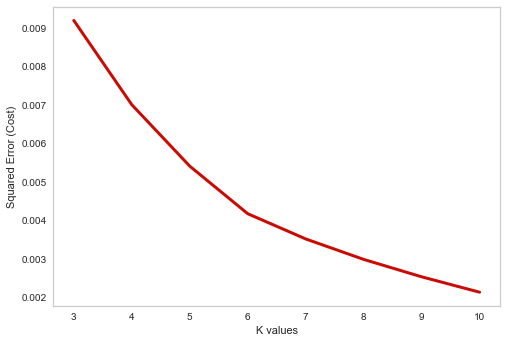

In [43]:
toronto_grouped_clustering = toronto_grouped_pastry.drop('Neighborhood', 1)
error_cost = []

# run k-means clustering
for i in range(3,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    try:
        kmeans.fit(toronto_grouped_clustering)
    except ValueError:
        print("error on line ", i)
        
    #calculate squared error for the clustered points
    error_cost.append(kmeans.inertia_/100)

# plot the K values against the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

Use the K Elbow Visualizer to further aid in choosing K

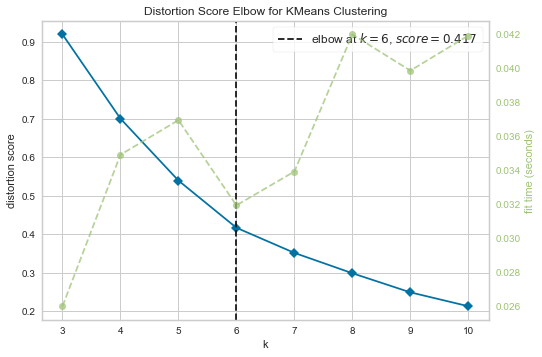

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(3,11))
visualizer.fit(toronto_grouped_clustering)
visualizer.show()

Use K = 5

In [45]:
toronto_grouped_clustering
kclusters = 6

# run k-means clustering
torkmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
torkmeans.labels_[0:10] 

array([2, 2, 2, 1, 2, 1, 4, 4, 2, 5])

In [46]:
torkmeans.labels_

array([2, 2, 2, 1, 2, 1, 4, 4, 2, 5, 1, 4, 2, 2, 2, 2, 1, 2, 2, 2, 4, 4,
       4, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 5, 1, 1, 2, 4, 0, 1, 4, 2, 1, 2,
       4, 4, 4, 2, 3, 4, 2, 4, 2, 1, 1, 1, 4, 4, 4, 2, 4, 3, 3, 4, 4, 4,
       1, 2, 1, 4, 2, 2, 2, 4, 4, 2, 1, 1, 2, 4, 4, 2, 4, 2, 2, 4, 3, 0,
       2, 4, 3, 3, 3, 1, 4, 1, 0, 5, 4, 0, 2, 2, 4, 4, 4, 4, 4, 0, 4, 4,
       2, 4, 1, 0, 2, 1, 2, 4, 2, 2, 1, 1, 4, 4, 2, 2, 2, 1, 4, 1, 1, 4,
       4, 2, 2, 4, 1, 0, 4, 4, 1, 1, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 5, 2, 4, 1, 5, 4, 1, 4, 4, 2, 4, 2, 2, 4, 1, 1, 1,
       4, 2, 0, 4, 0, 0, 1, 2])

In [47]:
neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue  \
0                           Adelaide           Coffee Shop   
1                          Agincourt           Coffee Shop   
2                    Agincourt North                Bakery   
3                          Alderwood           Coffee Shop   
4                     Bathurst Manor           Coffee Shop   
5                      Bathurst Quay           Coffee Shop   
6                    Bayview Village              Tea Room   
7                       Bedford Park              Tea Room   
8                        Berczy Park           Coffee Shop   
9                        Birch Cliff                  Café   
10                 Bloordale Gardens            Donut Shop   
11   Broadview North (Old East York)              Tea Room   
12                          Brockton           Coffee Shop   
13                          CN Tower           Coffee Shop   
14                       Cabbagetown                  Café   
15                         Cedarbrae           Coffee Shop   
16                Central Bay Street           Coffee Shop   
17                         Chinatown                  Café   
18                          Christie           Coffee Shop   
19              Church and Wellesley           Coffee Shop   
20                          Clairlea              Tea Room   
21                    Clarks Corners              Tea Room   
22                        Cliffcrest              Tea Room   
23                         Cliffside           Coffee Shop   
24                    Cliffside West           Coffee Shop   
25                        Cloverdale           Coffee Shop   
26                    Commerce Court           Coffee Shop   
27                        Davisville           Coffee Shop   
28                  Davisville North           Coffee Shop   
29                         Deer Park           Coffee Shop   
30                   Design Exchange           Coffee Shop   
31                         Don Mills           Coffee Shop   
32                       Dorset Park           Coffee Shop   
33                Dovercourt Village                  Café   
34                         Downsview           Coffee Shop   
35                   Downsview North           Coffee Shop   
36                          Dufferin                Bakery   
37              East Birchmount Park              Tea Room   
38                      East Toronto           Coffee Shop   
39                             Emery              Tea Room   
40                          Eringate              Tea Room   
41                  Exhibition Place           Coffee Shop   
42                          Fairview           Coffee Shop   
43              First Canadian Place           Coffee Shop   
44          Forest Hill North & West           Coffee Shop   
45             Forest Hill Road Park              Tea Room   
46                    Forest Hill SE              Tea Room   
47                   Garden District           Coffee Shop   
48                         Glencairn                Bakery   
49                       Golden Mile           Coffee Shop   
50                       Grange Park           Coffee Shop   
51                         Guildwood              Tea Room   
52                           Harbord           Coffee Shop   
53                      Harbourfront           Coffee Shop   
54                 Harbourfront East           Coffee Shop   
55                 Harbourfront West           Coffee Shop   
56                        Henry Farm              Tea Room   
57                         High Park                  Café   
58                    Highland Creek              Tea Room   
59                 Hillcrest Village                  Café   
60                        Humber Bay              Tea Room   
61                     Humber Summit                Bakery   
62             Humber Valley Village                Bakery   
63                         Humberlea              Tea Ro

In [48]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', torkmeans.labels_)

In [49]:
neighborhoods_venues_sorted

Cluster Labels                     Neighborhood 1st Most Common Venue  \
0                 2                         Adelaide           Coffee Shop   
1                 2                        Agincourt           Coffee Shop   
2                 2                  Agincourt North                Bakery   
3                 1                        Alderwood           Coffee Shop   
4                 2                   Bathurst Manor           Coffee Shop   
5                 1                    Bathurst Quay           Coffee Shop   
6                 4                  Bayview Village              Tea Room   
7                 4                     Bedford Park              Tea Room   
8                 2                      Berczy Park           Coffee Shop   
9                 5                      Birch Cliff                  Café   
10                1                Bloordale Gardens            Donut Shop   
11                4  Broadview North (Old East York)              Tea Room   
12                2                         Brockton           Coffee Shop   
13                2                         CN Tower           Coffee Shop   
14                2                      Cabbagetown                  Café   
15                2                        Cedarbrae           Coffee Shop   
16                1               Central Bay Street           Coffee Shop   
17                2                        Chinatown                  Café   
18                2                         Christie           Coffee Shop   
19                2             Church and Wellesley           Coffee Shop   
20                4                         Clairlea              Tea Room   
21                4                   Clarks Corners              Tea Room   
22                4                       Cliffcrest              Tea Room   
23                1                        Cliffside           Coffee Shop   
24                1                   Cliffside West           Coffee Shop   
25                2                       Cloverdale           Coffee Shop   
26                1                   Commerce Court           Coffee Shop   
27                2                       Davisville           Coffee Shop   
28                2                 Davisville North           Coffee Shop   
29                2                        Deer Park           Coffee Shop   
30                1                  Design Exchange           Coffee Shop   
31                2                        Don Mills           Coffee Shop   
32                2                      Dorset Park           Coffee Shop   
33                5               Dovercourt Village                  Café   
34                1                        Downsview           Coffee Shop   
35                1                  Downsview North           Coffee Shop   
36                2                         Dufferin                Bakery   
37                4             East Birchmount Park              Tea Room   
38                0                     East Toronto           Coffee Shop   
39                1                            Emery              Tea Room   
40                4                         Eringate              Tea Room   
41                2                 Exhibition Place           Coffee Shop   
42                1                         Fairview           Coffee Shop   
43                2             First Canadian Place           Coffee Shop   
44                4         Forest Hill North & West           Coffee Shop   
45                4            Forest Hill Road Park              Tea Room   
46                4                   Forest Hill SE              Tea Room   
47                2                  Garden District           Coffee Shop   
48                3                        Glencairn                Bakery   
49                4                      Golden Mile           Coffee Shop   
50                2        

In [50]:
df_Canada

Postal Code           Borough                    Neighbourhood   Latitude  \
0           M3A        North York                        Parkwoods  43.761124   
1           M4A        North York                 Victoria Village  43.732658   
2           M5A  Downtown Toronto                      Regent Park  43.660706   
3           M5A  Downtown Toronto                     Harbourfront  43.640080   
4           M6A        North York                   Lawrence Manor  43.722079   
5           M6A        North York                 Lawrence Heights  43.722778   
6           M7A  Downtown Toronto                     Queen's Park  43.659659   
7           M9A         Etobicoke                 Islington Avenue  43.621482   
8           M9A         Etobicoke            Humber Valley Village  43.666472   
9           M1B       Scarborough                          Malvern  43.809196   
10          M1B       Scarborough                            Rouge  43.804930   
11          M3B        North York                        Don Mills  43.775347   
12          M4B         East York                 Woodbine Gardens  43.712078   
13          M5B  Downtown Toronto                  Garden District  43.656500   
14          M5B  Downtown Toronto                          Ryerson  43.658469   
15          M6B        North York                        Glencairn  43.708712   
16          M9B         Etobicoke                  West Deane Park  43.663199   
17          M9B         Etobicoke                 Princess Gardens  43.640466   
18          M9B         Etobicoke                        Islington  43.645335   
19          M9B         Etobicoke                       Cloverdale  43.633637   
20          M1C       Scarborough                       Rouge Hill  43.780271   
21          M1C       Scarborough                       Port Union  43.775504   
22          M1C       Scarborough                   Highland Creek  43.790117   
23          M3C        North York                        Don Mills  43.775347   
24          M4C         East York                 Woodbine Heights  43.699920   
25          M5C  Downtown Toronto                   St. James Town  43.669403   
26          M6C              York               Humewood-Cedarvale  43.688322   
27          M9C         Etobicoke                         Eringate  43.662273   
28          M9C         Etobicoke                Bloordale Gardens  43.635317   
29          M9C         Etobicoke                Old Burnhamthorpe  43.639373   
30          M1E       Scarborough                        Guildwood  43.755225   
31          M1E       Scarborough                      Morningside  43.782601   
32          M1E       Scarborough                        West Hill  43.768914   
33          M4E      East Toronto                      The Beaches  43.671024   
34          M5E  Downtown Toronto                      Berczy Park  43.647984   
35          M1G       Scarborough                           Woburn  43.759824   
36          M4G         East York                          Leaside  43.704798   
37          M5G  Downtown Toronto               Central Bay Street  43.655644   
38          M6G  Downtown Toronto                         Christie  43.664111   
39          M1H       Scarborough                        Cedarbrae  43.756467   
40          M2H        North York                Hillcrest Village  43.681695   
41          M3H        North York                   Bathurst Manor  43.665519   
42          M3H        North York                   Wilson Heights  43.740519   
43          M3H        North York                  Downsview North  43.749299   
44          M4H         East York                 Thorncliffe Park  43.704553   
45          M5H  Downtown Toronto                         Richmond  43.652744   
46          M5H  Downtown Toronto                         Adelaide  43.650298   
47          M5H  Downtown Toronto                             King  43.648949   
48          M6H      West Toronto  

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [51]:
toronto_merged = df_Canada

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged = toronto_merged[~toronto_merged['Cluster Labels'].isnull()]
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)
toronto_merged

Postal Code           Borough                    Neighbourhood   Latitude  \
0           M3A        North York                        Parkwoods  43.761124   
1           M4A        North York                 Victoria Village  43.732658   
2           M5A  Downtown Toronto                      Regent Park  43.660706   
3           M5A  Downtown Toronto                     Harbourfront  43.640080   
4           M6A        North York                   Lawrence Manor  43.722079   
5           M6A        North York                 Lawrence Heights  43.722778   
6           M7A  Downtown Toronto                     Queen's Park  43.659659   
7           M9A         Etobicoke                 Islington Avenue  43.621482   
8           M9A         Etobicoke            Humber Valley Village  43.666472   
9           M1B       Scarborough                          Malvern  43.809196   
10          M1B       Scarborough                            Rouge  43.804930   
11          M3B        North York                        Don Mills  43.775347   
12          M4B         East York                 Woodbine Gardens  43.712078   
13          M5B  Downtown Toronto                  Garden District  43.656500   
14          M5B  Downtown Toronto                          Ryerson  43.658469   
15          M6B        North York                        Glencairn  43.708712   
17          M9B         Etobicoke                 Princess Gardens  43.640466   
18          M9B         Etobicoke                        Islington  43.645335   
19          M9B         Etobicoke                       Cloverdale  43.633637   
20          M1C       Scarborough                       Rouge Hill  43.780271   
21          M1C       Scarborough                       Port Union  43.775504   
22          M1C       Scarborough                   Highland Creek  43.790117   
23          M3C        North York                        Don Mills  43.775347   
24          M4C         East York                 Woodbine Heights  43.699920   
25          M5C  Downtown Toronto                   St. James Town  43.669403   
26          M6C              York               Humewood-Cedarvale  43.688322   
27          M9C         Etobicoke                         Eringate  43.662273   
28          M9C         Etobicoke                Bloordale Gardens  43.635317   
29          M9C         Etobicoke                Old Burnhamthorpe  43.639373   
30          M1E       Scarborough                        Guildwood  43.755225   
31          M1E       Scarborough                      Morningside  43.782601   
32          M1E       Scarborough                        West Hill  43.768914   
33          M4E      East Toronto                      The Beaches  43.671024   
34          M5E  Downtown Toronto                      Berczy Park  43.647984   
35          M1G       Scarborough                           Woburn  43.759824   
36          M4G         East York                          Leaside  43.704798   
37          M5G  Downtown Toronto               Central Bay Street  43.655644   
38          M6G  Downtown Toronto                         Christie  43.664111   
39          M1H       Scarborough                        Cedarbrae  43.756467   
40          M2H        North York                Hillcrest Village  43.681695   
41          M3H        North York                   Bathurst Manor  43.665519   
42          M3H        North York                   Wilson Heights  43.740519   
43          M3H        North York                  Downsview North  43.749299   
44          M4H         East York                 Thorncliffe Park  43.704553   
45          M5H  Downtown Toronto                         Richmond  43.652744   
46          M5H  Downtown Toronto                         Adelaide  43.650298   
47          M5H  Downtown Toronto                             King  43.648949   
48          M6H      West Toronto                         Dufferin  43.660202   
49          M6H      West Toronto  

Finally, let's visualize the resulting clusters


In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

print(rainbow)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    #print(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#1996f3', '#4df3ce', '#b2f396', '#ff964f', '#ff0000']


<a id='item5'></a>


In [53]:
toronto_merged.shape

(193, 14)

## 4. Examine Clusters


Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.


A quick look at the clusters suggest that we may want to focus efforts on Clusters 2 (Coffee Shops) & 3 (Cafes), which have a higher concentration of Coffee Shops and Cafes. Further, Cluster 1 has more bakeries that will compete with our store.

A closer inspection of Cluster 2 below, together with the respective neighborhood scores in section 3 above, suggests that the neighborhoods of Oriole, Queen's Park, Roselawn, and St. James Town are of most interest as they have the most coffee shops & cafes while having a low or no presence for bakeries and donut shops.

To close off the analysis, while the four neighborhoods above provide a starting point, due diligence is needed on the part of the cautious entrepreneur to inspect these neighborhoods further, and if necessary, expand the analysis to include more neighborhoods from Cluster 2, or Cluster 3, and supplementary data from other sources.

In [85]:
toronto_merged_scores = toronto_merged.join(toronto_grouped_pastry.set_index('Neighborhood'), on='Neighbourhood')

#### Cluster 1 - High Density Coffee Shops


In [93]:
toronto_merged_scores[toronto_merged_scores['Cluster Labels'] == 0]

Postal Code           Borough         Neighbourhood   Latitude  Longitude  \
6           M7A  Downtown Toronto          Queen's Park  43.659659 -79.390340   
12          M4B         East York      Woodbine Gardens  43.712078 -79.302567   
53          M2J        North York                Oriole  43.765498 -79.364269   
56          M4J         East York          East Toronto  43.721789 -79.374027   
78          M2L        North York            York Mills  43.744039 -79.406657   
84          M6L        North York            North Park  43.718690 -79.477534   
97          M6M              York          Mount Dennis  43.686960 -79.489551   
113         M2P        North York       York Mills West  43.744039 -79.406657   
131         M9R         Etobicoke          St. Phillips  43.700048 -79.543765   
132         M9R         Etobicoke  Martin Grove Gardens  43.687311 -79.561967   
188         M8Y         Etobicoke    The Queensway East  43.609309 -79.567732   

                                            Address  \
6            Queen's Park, Toronto City, ON, Canada   
12       Woodbine Gardens, Toronto City, ON, Canada   
53                 Oriole, Toronto City, ON, Canada   
56           East Toronto, Toronto City, ON, Canada   
78             York Mills, Toronto City, ON, Canada   
84             North Park, Toronto City, ON, Canada   
97           Mount Dennis, Toronto City, ON, Canada   
113       York Mills West, Toronto City, ON, Canada   
131          St. Phillips, Toronto City, ON, Canada   
132  Martin Grove Gardens, Toronto City, ON, Canada   
188    The Queensway East, Toronto City, ON, Canada   

                                           Coordinates  Cluster Labels  \
6    (Queen's Park, University Avenue, Discovery Di...               0   
12   (Woodbine Gardens, Beaches—East York, East Yor...               0   
53   (Oriole, Highway 401 Collectors, Silver Hills,...               0   
56   (E Wing, Life Saving Drive, Don Valley West, N...               0   
78   (York Mills, Wilson Avenue, St. John, Don Vall...               0   
84   (North Park, York South—Weston, North York, To...               0   
97   (Mount Dennis, York South—Weston, York, Toront...               0   
113  (York Mills, Wilson Avenue, St. John, Don Vall...               0   
131  (St. Phillips, Etobicoke North, Etobicoke, Tor...               0   
132  (Martin Grove Gardens, Etobicoke Centre, Etobi...               0   
188  (Queensway East, Etobicoke—Lakeshore, Etobicok...               0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
6             Coffee Shop                  Café            Donut Shop   
12            Coffee Shop                Bakery              Tea Room   
53            Coffee Shop              Tea Room           Pastry Shop   
56            Coffee Shop              Tea Room           Pastry Shop   
78            Coffee Shop              Tea Room           Pastry Shop   
84            Coffee Shop              Tea Room           Pastry Shop   
97            Coffee Shop              Tea Room           Pastry Shop   
113           Coffee Shop              Tea Room           Pastry Shop   
131           Coffee Shop              Tea Room           Pastry Shop   
132           Coffee Shop              Tea Room           Pastry Shop   
188           Coffee Shop              Tea Room           Pastry Shop   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  Bakery  \
6                Tea Room           Pastry Shop                Bakery     0.0   
12            Pastry Shop            Donut Shop                  Café     0.2   
53             Donut Shop                  Café                Bakery     0.0   
56             Donut Shop                  Café                Bakery     0.0   
78             Donut Shop                  Café                Bakery     0.0   
84             Donut Shop                  Café                Bakery     0.0   
97             Donut Shop            

#### Cluster 2 - Coffee Shops and Mid Density Cafes


In [94]:
toronto_merged_scores[toronto_merged_scores['Cluster Labels'] == 1]

Postal Code           Borough             Neighbourhood   Latitude  \
2           M5A  Downtown Toronto               Regent Park  43.660706   
3           M5A  Downtown Toronto              Harbourfront  43.640080   
14          M5B  Downtown Toronto                   Ryerson  43.658469   
17          M9B         Etobicoke          Princess Gardens  43.640466   
18          M9B         Etobicoke                 Islington  43.645335   
25          M5C  Downtown Toronto            St. James Town  43.669403   
28          M9C         Etobicoke         Bloordale Gardens  43.635317   
31          M1E       Scarborough               Morningside  43.782601   
37          M5G  Downtown Toronto        Central Bay Street  43.655644   
43          M3H        North York           Downsview North  43.749299   
50          M1J       Scarborough       Scarborough Village  43.743742   
51          M2J        North York                  Fairview  43.643430   
55          M3J        North York           York University  43.774332   
58          M5J  Downtown Toronto         Harbourfront East  43.640080   
59          M5J  Downtown Toronto             Union Station  43.644693   
67          M3K        North York                 Downsview  43.749299   
71          M5K  Downtown Toronto           Design Exchange  43.647741   
80          M3L        North York                 Downsview  43.749299   
82          M5L  Downtown Toronto            Commerce Court  43.648095   
83          M5L  Downtown Toronto            Victoria Hotel  43.669469   
88          M1M       Scarborough                 Cliffside  43.711170   
90          M1M       Scarborough  Scarborough Village West  43.743742   
91          M2M        North York                Willowdale  43.761510   
93          M3M        North York                 Downsview  43.749299   
94          M4M      East Toronto           Studio District  43.660367   
99          M9M        North York                     Emery  43.752074   
101         M1N       Scarborough            Cliffside West  43.711170   
102         M2N        North York                Willowdale  43.761510   
103         M2N        North York           Willowdale East  43.761510   
104         M3N        North York                 Downsview  43.749299   
106         M5N   Central Toronto                  Roselawn  43.707490   
122         M2R        North York                Willowdale  43.761510   
123         M2R        North York           Willowdale West  43.761510   
142         M1T       Scarborough                  Sullivan  43.772680   
151         M1V       Scarborough           L'Amoreaux East  43.799003   
159         M5V  Downtown Toronto         Harbourfront West  43.640080   
160         M5V  Downtown Toronto             Bathurst Quay  43.635790   
166         M9V         Etobicoke                 Jamestown  43.643430   
169         M1W       Scarborough           L'Amoreaux West  43.799003   
170         M4W  Downtown Toronto                  Rosedale  43.678356   
171         M8W         Etobicoke                 Alderwood  43.601717   
175         M4X  Downtown Toronto            St. James Town  43.669403   
180         M8X         Etobicoke           Montgomery Road  43.650575   

     Longitude                                            Address  \
2   -79.360457              Regent Park, Toronto City, ON, Canada   
3   -79.380150             Harbourfront, Toronto City, ON, Canada   
14  -79.378993                  Ryerson, Toronto City, ON, Canada   
17  -79.391224         Princess Gardens, Toronto City, ON, Canada   
18  -79.524816                Islington, Toronto City, ON, Canada   
25  -79.372704           St. James Town, Toronto City, ON, Canada   
28  -79.563674        Bloordale Gardens, Toronto City, ON, Canada   
31  -79.204958              Morningside, Toronto City, ON, Canada   
37  -79.383701       Central Bay Street, Toronto City, ON, Canada   
43  -79.462248          Downsview North, Toronto City, ON

#### Cluster 3 - Low density Coffee Shops and Cafes


In [95]:
toronto_merged_scores[toronto_merged_scores['Cluster Labels'] == 2]

Postal Code           Borough             Neighbourhood   Latitude  \
0           M3A        North York                 Parkwoods  43.761124   
5           M6A        North York          Lawrence Heights  43.722778   
7           M9A         Etobicoke          Islington Avenue  43.621482   
11          M3B        North York                 Don Mills  43.775347   
13          M5B  Downtown Toronto           Garden District  43.656500   
19          M9B         Etobicoke                Cloverdale  43.633637   
23          M3C        North York                 Don Mills  43.775347   
34          M5E  Downtown Toronto               Berczy Park  43.647984   
35          M1G       Scarborough                    Woburn  43.759824   
38          M6G  Downtown Toronto                  Christie  43.664111   
39          M1H       Scarborough                 Cedarbrae  43.756467   
40          M2H        North York         Hillcrest Village  43.681695   
41          M3H        North York            Bathurst Manor  43.665519   
44          M4H         East York          Thorncliffe Park  43.704553   
45          M5H  Downtown Toronto                  Richmond  43.652744   
46          M5H  Downtown Toronto                  Adelaide  43.650298   
47          M5H  Downtown Toronto                      King  43.648949   
48          M6H      West Toronto                  Dufferin  43.660202   
61          M6J      West Toronto           Little Portugal  43.647413   
62          M6J      West Toronto                   Trinity  43.665302   
68          M4K      East Toronto         The Danforth West  43.686433   
69          M4K      East Toronto                 Riverdale  43.665470   
70          M5K  Downtown Toronto   Toronto Dominion Centre  43.647377   
72          M6K      West Toronto                  Brockton  43.650917   
74          M6K      West Toronto          Exhibition Place  43.633521   
105         M4N   Central Toronto             Lawrence Park  43.729199   
107         M6N              York                 Runnymede  43.651703   
108         M6N              York        The Junction North  43.665478   
109         M9N              York                    Weston  43.700161   
110         M1P       Scarborough               Dorset Park  43.752847   
114         M4P   Central Toronto          Davisville North  43.697936   
118         M6P      West Toronto        The Junction South  43.665478   
120         M1R       Scarborough                   Wexford  43.745377   
121         M1R       Scarborough                  Maryvale  43.759051   
124         M4R   Central Toronto        North Toronto West  43.646547   
125         M4R   Central Toronto             Lawrence Park  43.729199   
126         M5R   Central Toronto                 The Annex  43.670338   
127         M5R   Central Toronto                 Yorkville  43.671386   
129         M6R      West Toronto              Roncesvalles  43.651443   
134         M1S       Scarborough                 Agincourt  43.785353   
135         M4S   Central Toronto                Davisville  43.697936   
137         M5S  Downtown Toronto                   Harbord  43.661475   
138         M6S      West Toronto                 Runnymede  43.651703   
141         M1T       Scarborough             Tam O'Shanter  43.781045   
144         M4T   Central Toronto           Summerhill East  43.681678   
145         M5T  Downtown Toronto         Kensington Market  43.655214   
146         M5T  Downtown Toronto                 Chinatown  43.652924   
147         M5T  Downtown Toronto               Grange Park  43.652197   
149         M1V       Scarborough           Agincourt North  43.808038   
152         M4V   Central Toronto           Summerhill West  43.681678   
153         M4V   Central Toronto                 Rathnelly  43.679081   
154         M4V   Central Toronto                South Hill  43.677926   
156         M4V   Central Toronto                 Deer Park  43.688090   
157     

#### Cluster 4 - Bakeries


In [96]:
toronto_merged_scores[toronto_merged_scores['Cluster Labels'] == 3]

Postal Code     Borough          Neighbourhood   Latitude  Longitude  \
8           M9A   Etobicoke  Humber Valley Village  43.666472 -79.524314   
15          M6B  North York              Glencairn  43.708712 -79.440685   
85          M6L  North York        Maple Leaf Park  43.715824 -79.493416   
87          M9L  North York          Humber Summit  43.760078 -79.571760   
163         M8V   Etobicoke           Mimico South  43.616677 -79.496805   
187         M8Y   Etobicoke              Mimico NE  43.616677 -79.496805   
190         M8Z   Etobicoke              Mimico NW  43.616677 -79.496805   

                                             Address  \
8    Humber Valley Village, Toronto City, ON, Canada   
15               Glencairn, Toronto City, ON, Canada   
85         Maple Leaf Park, Toronto City, ON, Canada   
87           Humber Summit, Toronto City, ON, Canada   
163           Mimico South, Toronto City, ON, Canada   
187              Mimico NE, Toronto City, ON, Canada   
190              Mimico NW, Toronto City, ON, Canada   

                                           Coordinates  Cluster Labels  \
8    (Humber Valley, Etobicoke Centre, Etobicoke, T...               3   
15   (Glencairn, Allen Road, Glen Park, Eglinton—La...               3   
85   (Maple Leaf Park, York South—Weston, North Yor...               3   
87   (Humber Summit, Humber River—Black Creek, Nort...               3   
163  (Mimico, Windsor Street, Mimico Village, Etobi...               3   
187  (Mimico, Windsor Street, Mimico Village, Etobi...               3   
190  (Mimico, Windsor Street, Mimico Village, Etobi...               3   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
8                  Bakery              Tea Room           Pastry Shop   
15                 Bakery              Tea Room           Pastry Shop   
85                 Bakery              Tea Room           Pastry Shop   
87                 Bakery              Tea Room           Pastry Shop   
163                Bakery              Tea Room           Pastry Shop   
187                Bakery              Tea Room           Pastry Shop   
190                Bakery              Tea Room           Pastry Shop   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
8              Donut Shop           Coffee Shop                  Café   
15             Donut Shop           Coffee Shop                  Café   
85             Donut Shop           Coffee Shop                  Café   
87             Donut Shop           Coffee Shop                  Café   
163            Donut Shop           Coffee Shop                  Café   
187            Donut Shop           Coffee Shop                  Café   
190            Donut Shop           Coffee Shop                  Café   

       Bakery  Café  Coffee Shop  Donut Shop  Pastry Shop  Tea Room  
8    0.200000   0.0          0.0         0.0          0.0       0.0  
15   0.142857   0.0          0.0         0.0          0.0       0.0  
85   0.250000   0.0          0.0         0.0          0.0       0.0  
87   0.500000   0.0          0.0         0.0          0.0       0.0  
163  0.250000   0.0          0.0         0.0          0.0       0.0  
187  0.250000   0.0          0.0         0.0          0.0       0.0  
190  0.250000   0.0          0.0         0.0          0.0       0.0

#### Cluster 5 - Sparse neighborhoods

In [97]:
toronto_merged_scores[toronto_merged_scores['Cluster Labels'] == 4]

Postal Code           Borough                    Neighbourhood   Latitude  \
1           M4A        North York                 Victoria Village  43.732658   
4           M6A        North York                   Lawrence Manor  43.722079   
9           M1B       Scarborough                          Malvern  43.809196   
10          M1B       Scarborough                            Rouge  43.804930   
20          M1C       Scarborough                       Rouge Hill  43.780271   
21          M1C       Scarborough                       Port Union  43.775504   
22          M1C       Scarborough                   Highland Creek  43.790117   
24          M4C         East York                 Woodbine Heights  43.699920   
26          M6C              York               Humewood-Cedarvale  43.688322   
27          M9C         Etobicoke                         Eringate  43.662273   
29          M9C         Etobicoke                Old Burnhamthorpe  43.639373   
30          M1E       Scarborough                        Guildwood  43.755225   
32          M1E       Scarborough                        West Hill  43.768914   
33          M4E      East Toronto                      The Beaches  43.671024   
36          M4G         East York                          Leaside  43.704798   
42          M3H        North York                   Wilson Heights  43.740519   
52          M2J        North York                       Henry Farm  43.769509   
54          M3J        North York                   Northwood Park  43.754135   
57          M4J         East York  Broadview North (Old East York)  43.683924   
63          M1K       Scarborough                     Kennedy Park  43.724878   
64          M1K       Scarborough                          Ionview  43.735990   
65          M1K       Scarborough             East Birchmount Park  43.714167   
66          M2K        North York                  Bayview Village  43.769197   
73          M6K      West Toronto                 Parkdale Village  43.640495   
75          M1L       Scarborough                      Golden Mile  43.727841   
76          M1L       Scarborough                         Clairlea  43.708823   
77          M1L       Scarborough                         Oakridge  43.697174   
79          M2L        North York                     Silver Hills  43.761222   
81          M4L      East Toronto                 The Beaches West  43.671024   
86          M6L        North York                      Upwood Park  43.708654   
89          M1M       Scarborough                       Cliffcrest  43.721836   
92          M2M        North York                      Newtonbrook  43.795986   
95          M5M        North York                     Bedford Park  43.737388   
96          M5M        North York              Lawrence Manor East  43.722079   
98          M9M        North York                        Humberlea  43.721317   
111         M1P       Scarborough                  Wexford Heights  43.743242   
112         M1P       Scarborough          Scarborough Town Centre  43.776134   
115         M5P   Central Toronto         Forest Hill North & West  43.701028   
116         M5P   Central Toronto            Forest Hill Road Park  43.690469   
117         M6P      West Toronto                        High Park  43.653867   
119         M9P         Etobicoke                        Westmount  43.693640   
128         M6R      West Toronto                         Parkdale  43.640495   
130         M9R         Etobicoke                Kingsview Village  43.699539   
133         M9R         Etobicoke                 Richview Gardens  43.684834   
139         M6S      West Toronto                          Swansea  43.644940   
140         M1T       Scarborough                   Clarks Corners  43.796410   
143         M4T   Central Toronto                       Moore Park  43.690388   
148         M1V       Scarborough                         Milliken  43.823174   
150         M1V       Scarborough  

#### Cluster 6 - High density Cafes

In [98]:
toronto_merged_scores[toronto_merged_scores['Cluster Labels'] == 5]

Postal Code           Borough          Neighbourhood   Latitude  \
49          M6H      West Toronto     Dovercourt Village  43.665307   
60          M5J  Downtown Toronto        Toronto Islands  43.623054   
100         M1N       Scarborough            Birch Cliff  43.691805   
136         M5S  Downtown Toronto  University of Toronto  43.663462   
162         M8V         Etobicoke            New Toronto  43.600763   

     Longitude                                          Address  \
49  -79.432636     Dovercourt Village, Toronto City, ON, Canada   
60  -79.394316        Toronto Islands, Toronto City, ON, Canada   
100 -79.264494            Birch Cliff, Toronto City, ON, Canada   
136 -79.397760  University of Toronto, Toronto City, ON, Canada   
162 -79.505264            New Toronto, Toronto City, ON, Canada   

                                           Coordinates  Cluster Labels  \
49   (Dovercourt, Davenport, Old Toronto, Toronto, ...               5   
60   (Toronto Islands, Old Toronto, Toronto, Golden...               5   
100  (The Birch Cliff, Kingston Road, Birchcliff, S...               5   
136  (University of Toronto, Harbord Street, Harbor...               5   
162  (New Toronto, Etobicoke—Lakeshore, Etobicoke, ...               5   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
49                   Café           Coffee Shop                Bakery   
60                   Café              Tea Room           Pastry Shop   
100                  Café              Tea Room           Pastry Shop   
136                  Café                Bakery              Tea Room   
162                  Café                Bakery              Tea Room   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
49               Tea Room           Pastry Shop            Donut Shop   
60             Donut Shop           Coffee Shop                Bakery   
100            Donut Shop           Coffee Shop                Bakery   
136           Pastry Shop            Donut Shop           Coffee Shop   
162           Pastry Shop            Donut Shop           Coffee Shop   

       Bakery      Café  Coffee Shop  Donut Shop  Pastry Shop  Tea Room  
49   0.100000  0.200000          0.1         0.0          0.0       0.0  
60   0.000000  0.250000          0.0         0.0          0.0       0.0  
100  0.000000  0.250000          0.0         0.0          0.0       0.0  
136  0.035714  0.178571          0.0         0.0          0.0       0.0  
162  0.058824  0.176471          0.0         0.0          0.0       0.0